In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("Dataset.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os
import pathlib
import numpy as np

data_dir = pathlib.Path("/content/Dataset/Train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['German Sheperd' 'Golden Retriever' 'Poodle']


In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

def view_random_image(target_dir, classes):
  target_folder = pathlib.Path(target_dir)
  fig, axes = plt.subplots(1, len(classes), figsize=(15, 15))
  for i, cls in enumerate(classes):
    folder = target_folder / cls
    img_path = folder / random.choice(os.listdir(folder))
    img = mpimg.imread(img_path)
    axes[i].imshow(img)
    axes[i].set_title(cls)
    axes[i].axis(False)
  plt.show()


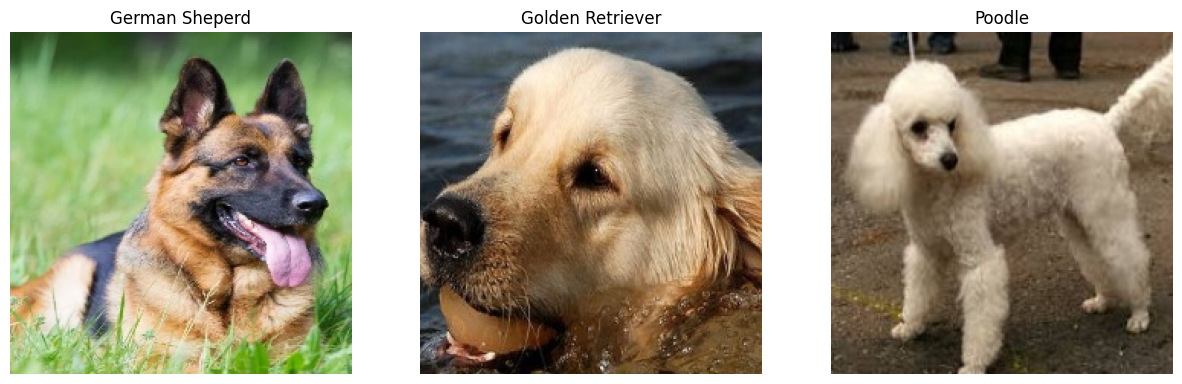

In [ ]:
view_random_image("/content/Dataset/Train", class_names)

In [ ]:
import numpy as np
def simulate_mixed_labels(pure_label, num_classes, mix_prob=0.02):
    pure_label = pure_label.numpy()  # Convert Tensor to NumPy
    if np.random.rand() < mix_prob:
        second_breed = np.random.randint(0, num_classes)

        while second_breed == np.argmax(pure_label):
            second_breed = np.random.randint(0, num_classes)

        alpha = np.random.uniform(0.4, 0.6)
        mixed_label = np.zeros_like(pure_label)
        mixed_label[np.argmax(pure_label)] = alpha
        mixed_label[second_breed] = 1 - alpha

        return mixed_label.astype(np.float32)
    else:
        return pure_label.astype(np.float32)


In [ ]:
def augment_labels(images, labels):
    return images, labels

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = "/content/Dataset/Train"
test_dir = "/content/Dataset/Valid"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size=25,
                                               class_mode ='categorical'
                                               )
test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size = (224,224),
                                               batch_size=25,
                                               class_mode ='categorical'
                                               )

Found 353 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [ ]:
import tensorflow as tf

train_dataset = tf.data.Dataset.from_generator(
    lambda: train_data,
    output_signature=(
        tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, 3), dtype=tf.float32)  # Changed output signature to (None, 3)
    )
).map(augment_labels, num_parallel_calls=tf.data.AUTOTUNE)

In [ ]:
import tensorflow_hub as hub

hub_layer = hub.KerasLayer("https://kaggle.com/models/google/resnet-v2/TensorFlow2/50-feature-vector/1",
                   trainable=False)

hub_layer_wrapper = tf.keras.layers.Lambda(lambda x: hub_layer(x))

m = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),
    hub_layer_wrapper,
    tf.keras.layers.Dense(3, activation='softmax')
])

The following Variables were used a Lambda layer's call (lambda), but
are not present in its tracked objects:
  <tf.Variable 'resnet_v2_50/block3/unit_1/bottleneck_v2/conv2/weights:0' shape=(3, 3, 256, 256) dtype=float32>
  <tf.Variable 'resnet_v2_50/block2/unit_2/bottleneck_v2/conv2/BatchNorm/gamma:0' shape=(128,) dtype=float32>
  <tf.Variable 'resnet_v2_50/block1/unit_3/bottleneck_v2/conv2/BatchNorm/gamma:0' shape=(64,) dtype=float32>
  <tf.Variable 'resnet_v2_50/block3/unit_6/bottleneck_v2/conv2/weights:0' shape=(3, 3, 256, 256) dtype=float32>
  <tf.Variable 'resnet_v2_50/block3/unit_1/bottleneck_v2/shortcut/weights:0' shape=(1, 1, 512, 1024) dtype=float32>
  <tf.Variable 'resnet_v2_50/block2/unit_2/bottleneck_v2/conv2/weights:0' shape=(3, 3, 128, 128) dtype=float32>
  <tf.Variable 'resnet_v2_50/block4/unit_3/bottleneck_v2/conv2/BatchNorm/beta:0' shape=(512,) dtype=float32>
  <tf.Variable 'resnet_v2_50/block4/unit_1/bottleneck_v2/preact/beta:0' shape=(1024,) dtype=float32>
  <tf.Var

In [ ]:
m.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [ ]:
steps_per_epoch = train_data.samples // train_data.batch_size
validation_steps = test_data.samples // test_data.batch_size

history = m.fit(
    train_dataset,
    epochs=10,
    validation_data=test_data,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps
)


Epoch 1/10
14/14 [==============================] - 15s 451ms/step - loss: 0.5591 - accuracy: 0.7743 - val_loss: 0.0608 - val_accuracy: 1.0000
Epoch 2/10
14/14 [==============================] - 5s 389ms/step - loss: 0.0335 - accuracy: 1.0000 - val_loss: 0.0101 - val_accuracy: 1.0000
Epoch 3/10
14/14 [==============================] - 5s 361ms/step - loss: 0.0130 - accuracy: 1.0000 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 4/10
14/14 [==============================] - 5s 354ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 5/10
14/14 [==============================] - 5s 353ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 6/10
14/14 [==============================] - 5s 355ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 7/10
14/14 [==============================] - 5s 360ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch

In [ ]:
import urllib.request
url = "https://images.saymedia-content.com/.image/t_share/MjAyNjg1NjIxNjU4MTMzNTcy/10-most-popular-golden-retriever-mix-hybrid-dogs.jpg"
filename = "image.jpg"
urllib.request.urlretrieve(url, filename)

('image.jpg', <http.client.HTTPMessage at 0x799cb06b15d0>)

In [ ]:
def prediction(filename):
    img = tf.keras.preprocessing.image.load_img(filename, target_size=(224, 224))
    img = tf.keras.preprocessing.image.img_to_array(img)

    img = img / 255.0
    img = tf.expand_dims(img, axis=0)
    pred = m.predict(img)

    pred_percentages = np.round(pred[0] * 100, 2)

    if np.max(pred_percentages) >= 99:
        top_breed = np.argmax(pred_percentages)
        label = f"{class_names[top_breed]}: {pred_percentages[top_breed]:.2f}%"
    else:
        label = ', '.join([f"{class_names[i]}: {pred_percentages[i]:.2f}%" for i in range(len(class_names))])

    plt.figure(figsize=(5, 5))
    plt.imshow(mpimg.imread(filename))
    plt.title(label)
    plt.axis("off")
    plt.show()


1/1 [==============================] - 0s 71ms/step


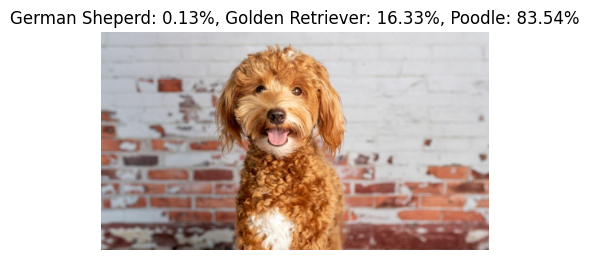

In [ ]:
prediction("image.jpg")